In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = [12.0, 8.0]
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200

In [50]:
# The names of each player I've collected data for and which seasons I've collected for each player in order.

name = ['James Harden', 'Anthony Davis', 'LeBron James', 'Giannis Antetokounmpo', 'Kevin Durant', 'Russell Westbrook', 'Victor Oladipo', 'Paul George', 'Joel Embiid', 'Devin Booker', 'Bradley Beal', 'Trae Young', 'Luka Doncic']
season = [['2018','2019','2020'],['2018','2020'],['2018'],['2018','2019','2020'],['2018','2019'],['2018'],['2018'],['2019'],['2019'],['2019'],['2019'],['2020'],['2020']]

# Loading all webscraped player data into a single data frame

features = pd.DataFrame()
labels = pd.DataFrame()



for i in range(len(name)):
    for j in range(len(season[i])):

        # Downloading the file data from the appropriate file path.
        # Loading a player's feature and label data for one season.

        feature_data = pd.read_csv(r'C:\Users\frank\OneDrive\Documents\DS\ML Basketball Data\Player Data\{}\{}'.format(name[i],season[i][j]),index_col=0)
        label_data = pd.read_csv(r'C:\Users\frank\OneDrive\Documents\DS\ML Basketball Data\Player Data\{}\Points\{}'.format(name[i],season[i][j]),index_col=0)

        # Putting all the data together from each player file
        
        features = pd.concat([features,feature_data])
        labels = pd.concat([labels,label_data])

features.reset_index(drop='True', inplace=True)
labels.reset_index(drop='True', inplace=True)

# Finding and removing NaN values from the datasets

print(features.isnull().values.any())
print(labels.isnull().values.any()) # null check

null_f = [] # list to contain the indices of rows with nan values in the feature data
for i in range(len(features)):
    if str(features.iloc[i].isnull().values.any()) == 'True':
        null_f.append(i)

null_l = [] # list to contain the indices of rows with nan values in the label data
for i in range(len(labels)):
    if str(labels.iloc[i].isnull().values.any()) == 'True':
        null_l.append(i)

features = features.drop(null_f,axis=0)
labels = labels.drop(null_f,axis=0)

print(features.isnull().values.any()) # null check after removal
print(labels.isnull().values.any())

True
True
False
False


The variables I'm interested in are field goals made FG, field goals attempted FGA, 3-pointers made 3P, 3-pointers attempted 3PA, free throws made FT, free throws attempted FTA, usage percentage USG% and offensive rating ORtg.

In [57]:
data = pd.concat([features,labels], axis=1)
data

,FG,FGA,3P,3PA,FT,FTA,USG%,ORtg,PTS
0,10.0,23.0,4.0,9.0,3.0,4.0,31.2,117.0,27.0
1,8.0,21.0,4.0,14.0,7.0,8.0,30.7,124.0,27.0
2,10.0,19.0,6.0,13.0,3.0,4.0,38.4,120.0,29.0
3,8.0,20.0,2.0,8.0,4.0,8.0,40.4,82.0,22.0
4,10.0,20.0,2.0,8.0,5.0,5.0,33.5,107.0,27.0
...,...,...,...,...,...,...,...,...,...
1353,12.0,24.0,2.0,6.0,8.0,11.0,32.9,115.0,34.0
1354,10.0,21.0,6.0,13.0,3.0,6.0,36.7,109.0,29.0
1355,12.0,24.0,3.0,9.0,9.0,10.0,29.4,140.0,36.0
1356,8.0,19.0,2.0,8.0,7.0,9.0,35.6,106.0,25.0


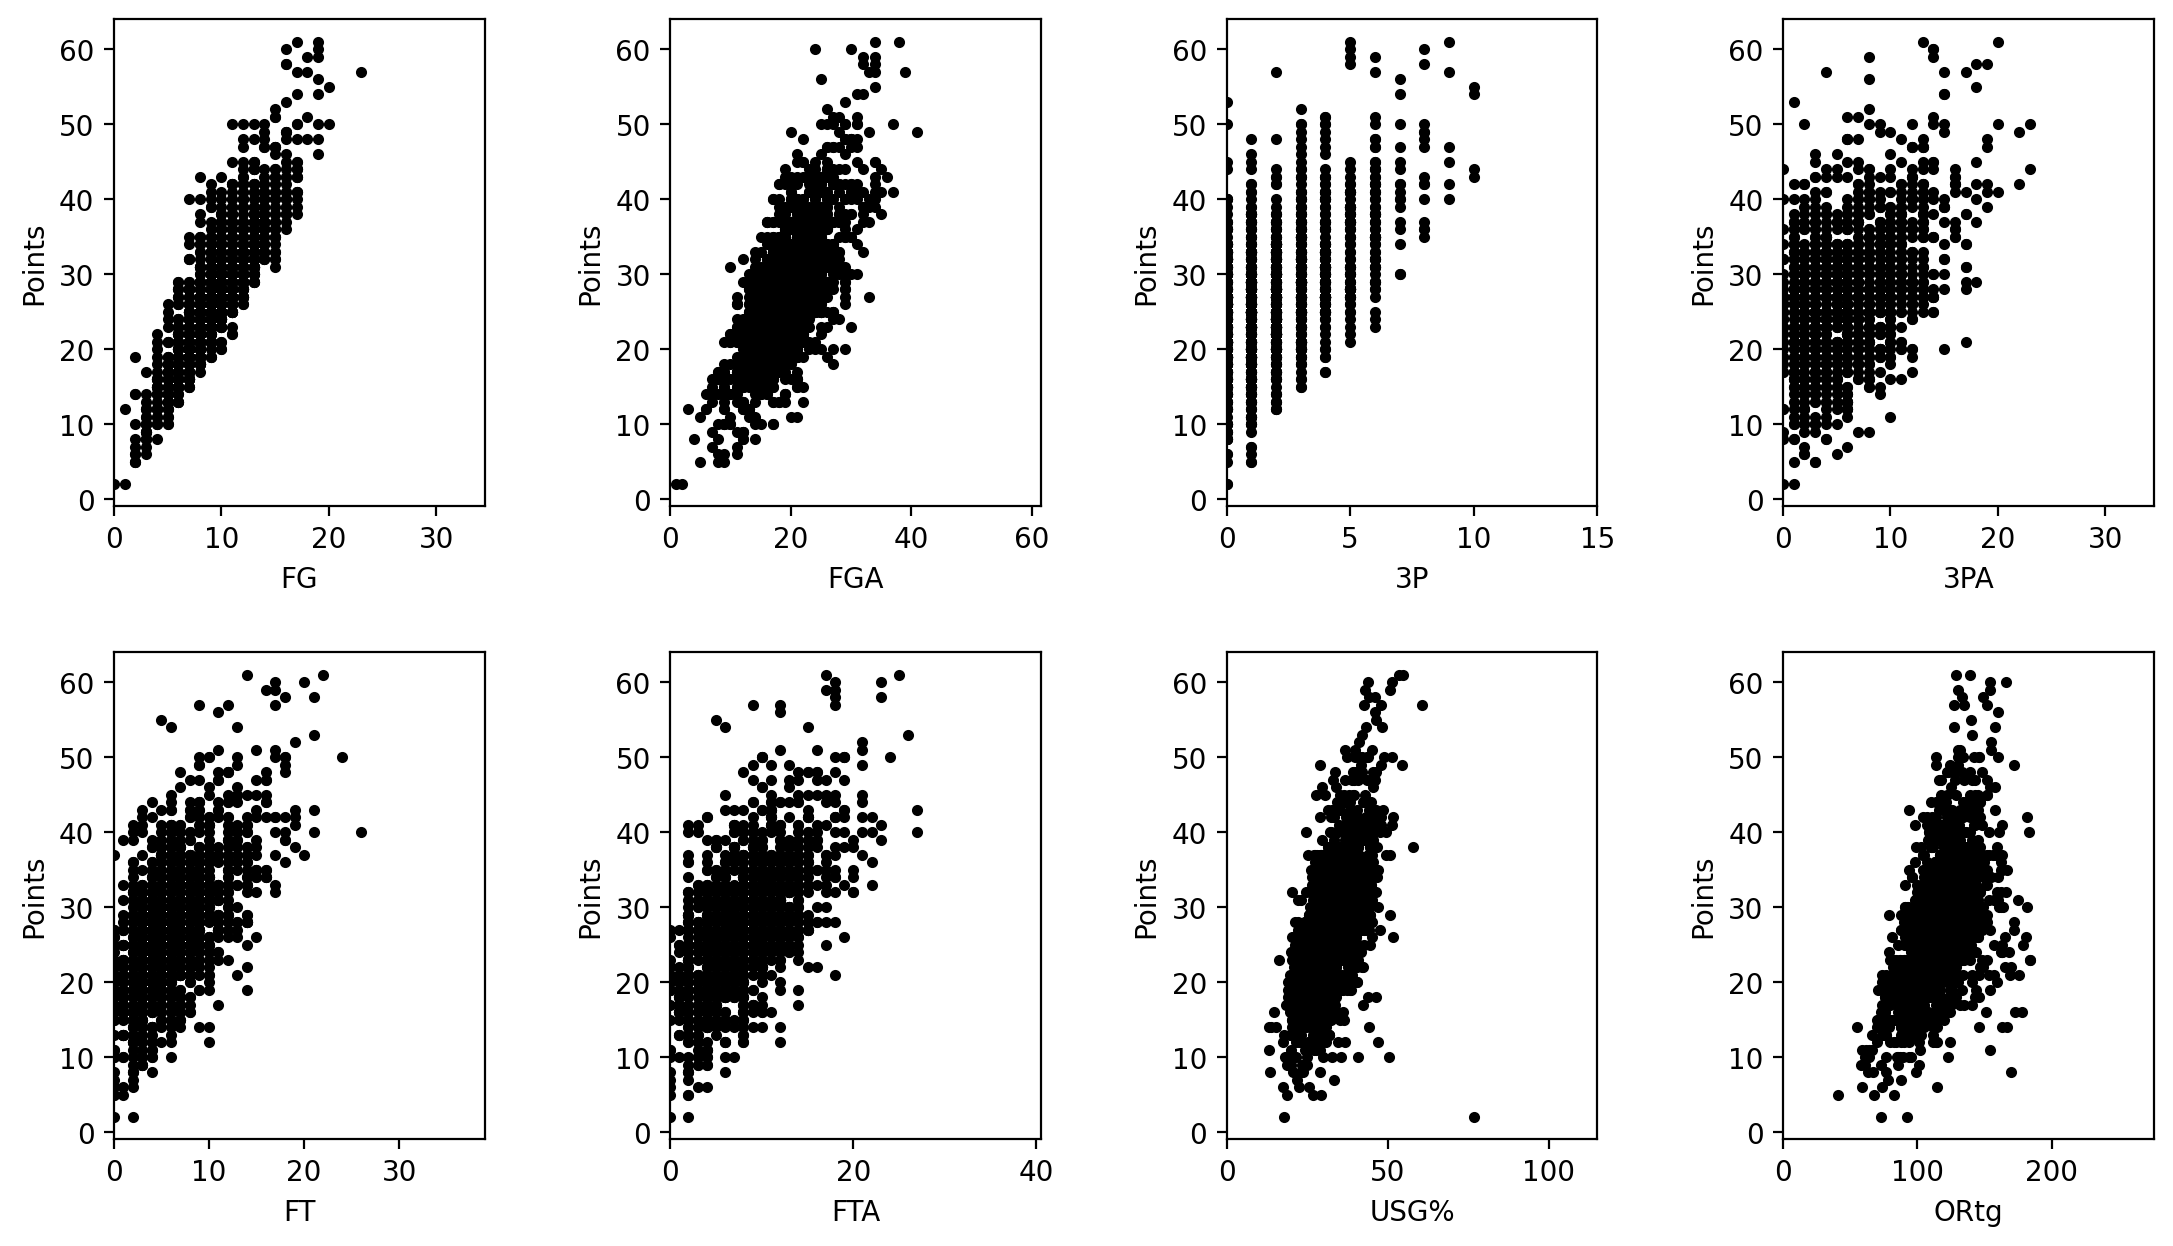

In [68]:
features = np.array(features)
labels = np.array(labels).flatten()
num_features = len(features[0])
columns = np.array(data.columns)

scatter_plot_data = []

for i in range(len(features)):
    scatter_plot_data.append([features[i],labels])

fig, ax = plt.subplots(2,num_features//2)

for i in range(2):
    for j in range(num_features//2):
        ax[i,j].scatter(features[:,(i*(num_features//2)+j)],labels, marker='.', c='k')
        ax[i,j].set_ylabel('Points')
        ax[i,j].set_xlabel(columns[(i*(num_features//2)+j)])
        ax[i,j].set_xlim([0,1.5*np.max(features[:,(i*(num_features//2)+j)])])

plt.subplots_adjust(left=0.05,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.3)

Here we can see that there is a much stronger correlation with the actual metrics that contribute to points (FG, 3P, FT) compared to the advanced statistics USG% and ORtg.
The latter two metrics may be more useful in predicting whether a player will have an efficient night, however I'm going to opt to use FG, 3P, FT and their associated attempted features to model the points scored by a player.